In [2]:
# genre_features.load_deserialize_data()

# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9, epsilon=1e-8, decay=0.
# SGD    : lr=0.01, momentum=0., decay=0.

train_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_input.npy')
train_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_target.npy')
dev_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_input.npy')
dev_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_target.npy')
test_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_input.npy')
test_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_target.npy')

opt = Adam()

batch_size = 35
nb_epochs = 400



Instructions for updating:
Colocations handled automatically by placer.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import librosa
import math
import re
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
import xlwt
from datetime import datetime

# Turn off TF verbose logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


In [3]:
print("Training X shape: " + str(train_X.shape))
print("Training Y shape: " + str(train_Y.shape))
print("Dev X shape: " + str(dev_X.shape))
print("Dev Y shape: " + str(dev_Y.shape))
print("Test X shape: " + str(test_X.shape))
print("Test Y shape: " + str(test_Y.shape))

input_shape = (train_X.shape[1], train_X.shape[2])
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=train_Y.shape[1], activation='softmax'))

print("Compiling ...")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Training X shape: (280, 128, 198)
Training Y shape: (280, 4)
Dev X shape: (120, 128, 198)
Dev Y shape: (120, 4)
Test X shape: (120, 128, 198)
Test Y shape: (120, 4)
Build LSTM RNN model ...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Compiling ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 128)          167424    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 188,164
Trainable params: 188,164
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("Training ...")
model.fit(train_X, train_Y, batch_size=batch_size, epochs=nb_epochs)

scorev, accuracyv = model.evaluate(dev_X, dev_Y, batch_size=batch_size, verbose=1)
print("Dev loss:  ", scorev)
print("Dev accuracy:  ", accuracyv)
    
score, accuracy = model.evaluate(test_X, test_Y, batch_size=batch_size, verbose=1)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)

Training ...
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
280/280 [==============================] - 6s 20ms/step - loss: 1.3558 - acc: 0.3929
Epoch 2/400
280/280 [==============================] - 3s 12ms/step - loss: 1.2482 - acc: 0.4607
Epoch 3/400
280/280 [==============================] - 3s 12ms/step - loss: 1.2073 - acc: 0.5036
Epoch 4/400
280/280 [==============================] - 3s 12ms/step - loss: 1.0780 - acc: 0.5821
Epoch 5/400
280/280 [==============================] - 3s 12ms/step - loss: 1.0080 - acc: 0.5857
Epoch 6/400
280/280 [==============================] - 3s 12ms/step - loss: 0.9537 - acc: 0.6250
Epoch 7/400
280/280 [==============================] - 3s 12ms/step - loss: 0.9159 - acc: 0.6000
Epoch 8/400
280/280 [==============================] - 3s 12ms/step - loss: 0.9235 - acc: 0.6179
Epoch 9/400
280/280 [==============================] - 3s 12ms/step - loss: 0.8443 - acc: 0.6714
Epoch 10/400
280/280 [==============================] - 3s 12ms/st

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

true_test = test_Y
pred_test = model.predict(test_X, batch_size=batch_size, verbose=1, steps=None)
true_dev = dev_Y
pred_dev = model.predict(dev_X, batch_size=batch_size, verbose=1, steps=None)
true_train = train_Y
pred_train = model.predict(train_X, batch_size=batch_size, verbose=1, steps=None)

matrix_test = confusion_matrix(true_test.argmax(axis=1), pred_test.argmax(axis=1))
matrix_dev = confusion_matrix(true_dev.argmax(axis=1), pred_dev.argmax(axis=1))
matrix_train = confusion_matrix(true_train.argmax(axis=1), pred_train.argmax(axis=1))

280/280 [==============================] - 1s 3ms/step


In [0]:
def plot_cm_test(cm, classes, title, cmap=plt.cm.Blues, normalize=False):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def plot_cm_dev(cm, classes, title, cmap=plt.cm.Blues, normalize=False):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def plot_cm_train(cm, classes, title, cmap=plt.cm.Blues, normalize=False):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    

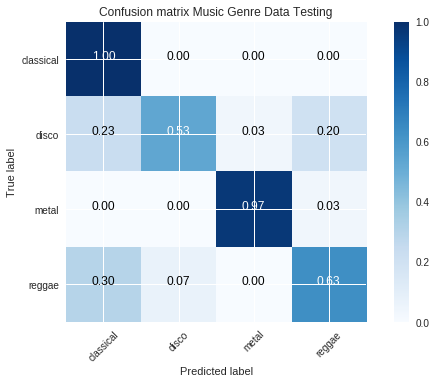

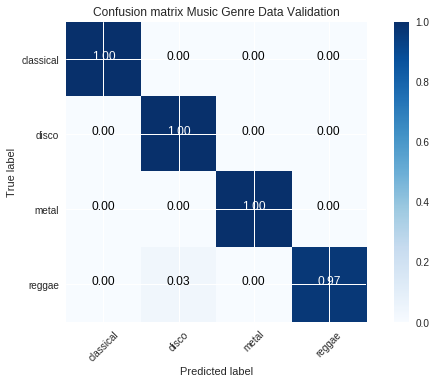

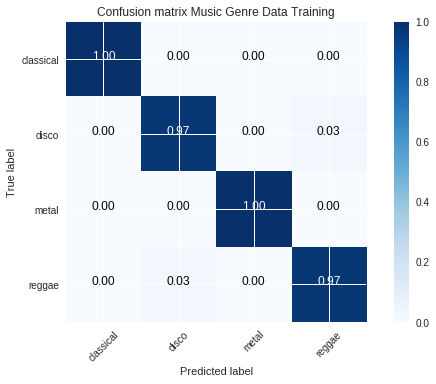

In [7]:
genre_list = ['classical', 'disco', 'metal', 'reggae']

plot_cm_test(matrix_test, classes=genre_list, normalize=True,
                      title='Confusion matrix Music Genre Data Testing')
plt.figure()
plot_cm_dev(matrix_dev, classes=genre_list, normalize=True,
                      title='Confusion matrix Music Genre Data Validation')
plt.figure()

plot_cm_train(matrix_train, classes=genre_list, normalize=True,
                      title='Confusion matrix Music Genre Data Training')

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(matrix, classes=genre_features.genre_list,
#                       title='Confusion matrix, without normalization')
plt.show()
